# Exercícios da Seção 10

1) Para resolvermos o exercícios deveremos considerar o arquivo tempo.csv. Neste arquivo teremos um conjunto de variáveis. Tais variáveis serão listadas abaixo com suas características, ou seja,
seus domínios.

- Aparência. Cujo domínio é: sol, chuvam, nublado.
- Temperatura. Cujo domínio é: -130 e 130 °F.
- Umidade: Cujo domínio é: 0 e 100.
- Vendo: Cujo domínio é: Verdadeiro ou Falso.
- Jogar: Cujo domínio é: sim ou não.

 No exercício devemos verificar se os domínios estão de fato corretos e se existem valores faltantes (NAs) para cada variável de nosso problema. Assim devemos tratar todas as situações
possíveis.

In [2]:
import pandas as pd
import seaborn as sns
import statistics as sts

In [3]:
# carregando dados do arquivos 
dataset = pd.read_csv('tempo.csv', sep=';')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     int64  
 2   Umidade      13 non-null     float64
 3   Vento        13 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 688.0+ bytes


In [4]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [5]:
# o método shape vai mostrar a quantidade de linhas e colunas em uma tupla
quant_linhas = dataset.shape[0]
quant_colunas = dataset.shape[1]
print(f'n° Linhas {quant_linhas} | n° Colunas {quant_colunas}')

n° Linhas 14 | n° Colunas 5


Como era esperado temos 5 colunas que correspondem as nossas variáveis de interrese, aparência,
temperatura, umidade e jogar.

## Análise Exploratória dos dados

Agora vamos iniciar de fato nossa análise exploratória dos dados. Vamos verificar as propriedades
dos dados. Buscaremos entender se esses dados estão dentro de um certo domínio e se não existem 
valores faltantes [NAs].

#### Etapa 1

Temos três variáveis categóricas: Aparência, Vento e Jogar. Vamos explorar cada uma dessas caterorias. 


- **Análise da categoria Aparências**

In [6]:
# verificando o grupo ou conjunto Aparencia
dataset.groupby(dataset['Aparencia']).size()

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

Note como existe um atributo que não pertence ao domínio, pois menos não deve fazer parte do 
conjunto aparência.

Text(0.5, 1.0, 'Aparência')

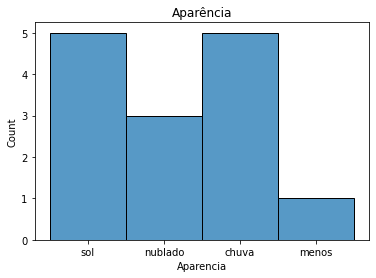

In [7]:
# verificando um gráfico de barras
sns.histplot(dataset['Aparencia']).set_title('Aparência')


Vamos verificar se existem valores não disponíveis para Aparência.

In [8]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64


Podemos perceber que a variável aparência não conta com nenhum valor NA.

- **Análise da categoria Vento**

In [9]:
dataset.groupby(dataset['Vento']).size()

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

Notamos que os dados estão dentro do domínio de interesse.

Text(0.5, 1.0, 'Vento')

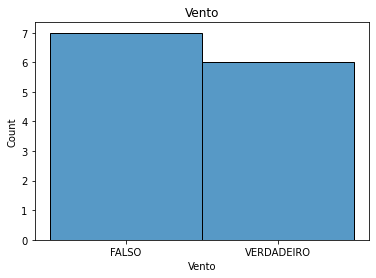

In [10]:
sns.histplot(dataset['Vento']).set_title('Vento')

In [11]:
valor_Na_vento = dataset['Vento'].isnull().sum()
print(f'N° de NAs para Vento = {valor_Na_vento}')

N° de NAs para Vento = 1


Embora os atributos estejam dentro do domínio do problema deveremos tratar o valor faltante.

- **Análise da categoria Jogar**

In [12]:
dataset.groupby(dataset['Jogar']).size()

Jogar
nao    5
sim    9
dtype: int64

Todos os dados estão dentro do domínio do problema.

Text(0.5, 1.0, 'Jogar')

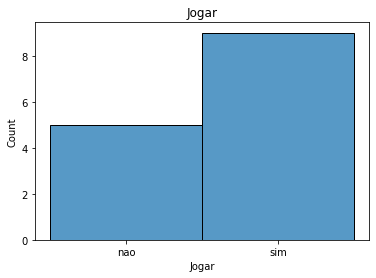

In [13]:
sns.histplot(dataset['Jogar']).set_title('Jogar')

In [14]:
dataset['Jogar'].isnull().sum()

0

#### Etapa 2

Agora vamos analisar as duas variáveis númericas que são elas: Temperatura e umidade.

- **Análise da variável numérica Temperatura**

Como temperatura é um dado numérico poderemos ver a estatística de seus resultados.


In [15]:
# Descrevendo os dados da temperatura.
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

O primeiro fato que chama a atenção é o valor máximo da temperatura ser muito acima do domínio do 
problema que é 130 ° F. O valor da média (155.571429) é também muito diferente do valor estabelecido
pela mediana (73.50), existem valores que estão distorcendo os dados e devem ser tratados.

Text(0.5, 1.0, 'Temperatura')

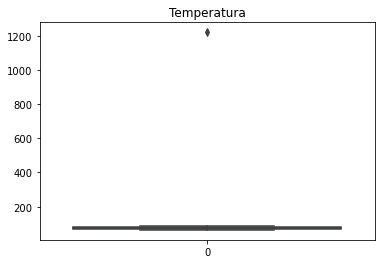

In [16]:
sns.boxplot(dataset['Temperatura']).set_title('Temperatura')

Pelo boxplot podemos perceber que o valor máximo da temperatura está realmente distorcendo os
valores médios, uma vez que é uma medida muito elevada.

Text(0.5, 1.0, 'Temperatura')

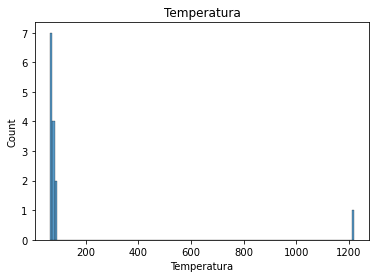

In [17]:
sns.histplot(dataset['Temperatura']).set_title('Temperatura')

O histograma mostra que somente um valor que está bem distante dos valores médios.

- **Análise da variável numérica Umidade**

Como Umidade é um dado numérico poderemos ver a estatística de seus resultados.


In [18]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Nesses dados podemos perceber que a média (89.76) e a mediana (85) estão próximos, entretanto 
o valor mínimo da umidade está bem elevado enquanto o valor máximo está fora do domínio do
problema.

Text(0.5, 1.0, 'Umidade')

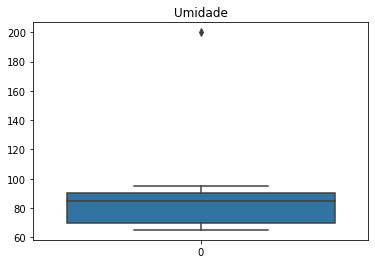

In [19]:
sns.boxplot(dataset['Umidade']).set_title('Umidade')

Pelo gráfico de boxplot podemos perceber que o valor de máximo é um valor outliers (discrepante). Sendo portanto um valor muito fora do padrão.

Text(0.5, 1.0, 'Umidade')

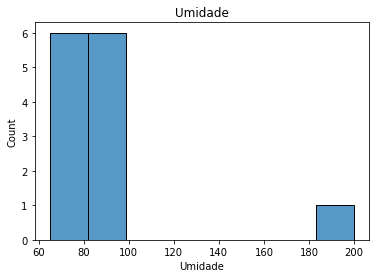

In [20]:
sns.histplot(dataset['Umidade']).set_title('Umidade')

Agora que terminamos a etapa da análise exploratória vamos tratar os resultados.

# Tratamento dos dados


#### Etapa 3

Agora vamos realizar o tratamento dos dados. Iniciaremos o tratamento dos dados categóricos.

- **Tratamento da variável categórica Aparência**

O problema existente nessa variável é o atributo menos, que não deve existir no contexto da variável. 
Vamos eliminar esse atributo e adicionar seu valor ao valor da moda. Como chuva e sol são as 
modas da variável Aparencia, então vamos estabelecer o valor chuva para receber o dado.


In [22]:
dataset.groupby(dataset['Aparencia']).size()

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [25]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'chuva'
dataset.groupby(dataset['Aparencia']).size()

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

- **Tratamento da variável categórica Vento**

Não existem problemas nessa variável. 

In [27]:
dataset.groupby(dataset['Vento']).size()

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [45]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          0
Jogar          0
dtype: int64

- **Tratamento da variável categórica Jogar**

Não existem problemas nessa variável.

In [29]:
dataset.groupby(dataset['Jogar']).size()

Jogar
nao    5
sim    9
dtype: int64

- **Tratamento da variável numérica Temperatura**

Nesse dado o valor de máximo está fora do domínio do problema, devemos buscar arrumar esse problema. Como conhecemos os valores
de extremo do problema, então podemos testar quantos valores são maiores ou menores que os extremos.

In [31]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


Podemos notar que somente existe um único valor que está fora do intervalo de interesse. Vamos calcular a mediana e substituir tal valor pela mediana.

In [33]:
mediana_temperatura = sts.median(dataset['Temperatura'])
mediana_temperatura

73.5

In [35]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)] = mediana_temperatura
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


Text(0.5, 1.0, 'Temperatura')

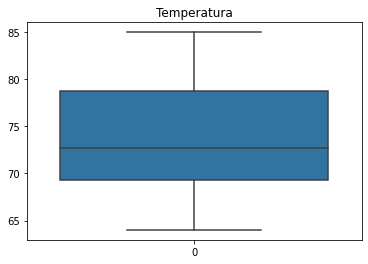

In [36]:
sns.boxplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

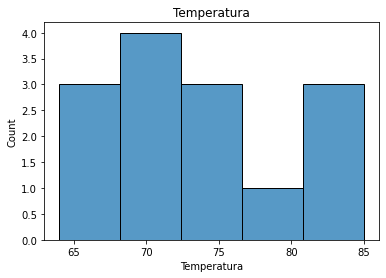

In [37]:
sns.histplot(dataset['Temperatura']).set_title('Temperatura')

Observe como os resultados ficaram agora muito harmônicos ser o valor outlier.

- **Tratamento da variável numérica Umidade**

Nesse dado o valor de máximo está fora do domínio do problema, devemos buscar arrumar esse problema. Como conhecemos os valores
de extremo do problema, então podemos testar quantos valores são maiores ou menores que os extremos.

In [38]:
dataset['Umidade'].describe()

count     13.000000
mean      88.115385
std       34.782751
min       65.000000
25%       70.000000
50%       80.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [39]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


Existe um valor de umidade que está fora do domínio do problema.

In [40]:
mediana_umidade = sts.median(dataset['Umidade'])
mediana_umidade

82.5

In [42]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)] = mediana_umidade
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


Text(0.5, 1.0, 'Umidade')

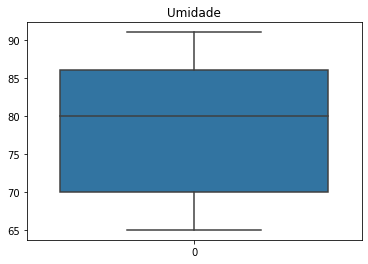

In [43]:
sns.boxplot(dataset['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

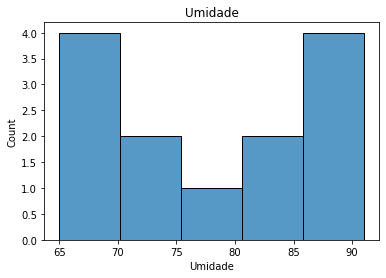

In [44]:
sns.histplot(dataset['Umidade']).set_title('Umidade')

Novamente podemos verificar uma harmônia nos resultados.

In [46]:
dataset['Umidade'].isnull().sum()

1

Como Umidade apresenta um valor falatante devemos tratar esse resultado.

In [49]:
dataset['Umidade'].fillna(mediana_umidade, inplace=True)
dataset['Umidade'].isnull().sum()

0

Text(0.5, 1.0, 'Umidade')

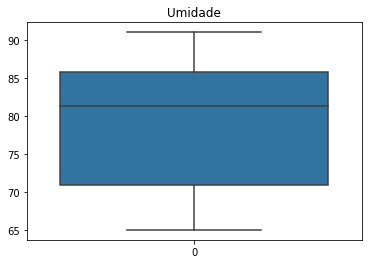

In [50]:
sns.boxplot(dataset['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

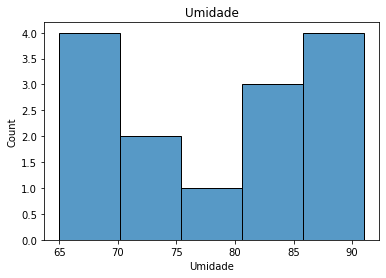

In [51]:
sns.histplot(dataset['Umidade']).set_title('Umidade')

Agora não temos valores faltantes na variável númerica umidade.

In [52]:
dataset.isnull()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [54]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

O nosso conjunto de dados não apresenta nenhum valor faltante. Concluimos o tratamento dos dados.